In [71]:
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import pandas as pd

def run():
    # os.system("cd scrapper_vi")
    # os.system("scrapy crawl vi")
    df = read_db()
    plot(df)

def read_db():
    db_path = 'scrapy_items.db'
    sqlEngine = create_engine('sqlite:///scrapy_items.db', pool_recycle=3600)
    dbConnection = sqlEngine.connect()
    items = pd.read_sql("select * from item", dbConnection)
    dbConnection.close()
    return items

In [72]:
df = read_db()
df['created_at'] = pd.to_datetime(df["created_at"])

In [73]:
unique_titles = df['title'].unique()

In [74]:
dfs = [df[df['title'] == x].reset_index() for x in unique_titles]

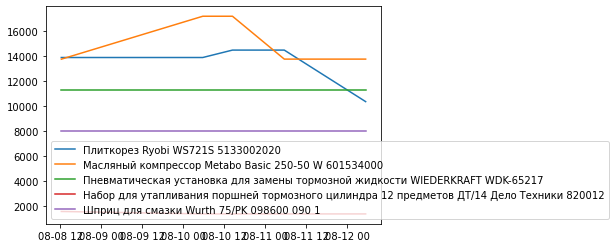

In [76]:
for df in dfs:
    plt.plot(df['created_at'], df['price'], label=df['title'][0])
    
plt.legend()
plt.show()